In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')
from people import people


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import display, HTML
def pretty_print(df):
    return display(HTML(df.to_html().replace("\n","<br>")))

In [105]:
df = pd.read_csv('results/all_kadist_works_clusters_results_wup_0.76.csv' )
df.drop(columns=['permalink'], inplace=True)
df.head()

,region,artist_name,title,machine_clusters_from_user_tags,machine_clusters_from_machine_tags,hits
0,Americas,"Jennifer Allora, Guillermo Calzadilla",Land Mark (Foot Prints) #12,"Arts,Inequality,Land","Space,Culture,Values",0
1,Unspecified,Gabriel Kuri,Untitled (Ticket Roll),"Immaterial,Time,Community",NaN,0
2,Americas,Renee Rhodes,Moving Clocks Change Rhythm,"Arts,Mind,Language","Emotion,Space,Geopolitics",0
3,Americas,Fiamma Montezemolo,Fireflies,"Body,Time,Materiality","Geopolitics,Time,Materiality",2
4,Europe,Mladen Stilinovic,Exploitation of the Dead,"Arts,Design,Media","Design,Identity,Fantasy",1


# How well overall did machine do

T = 0.8, similarity metric is how similar two word senses are, based on the depth of the two senses in the taxonomy and that of their Least Common Subsumer (most specific ancestor node).

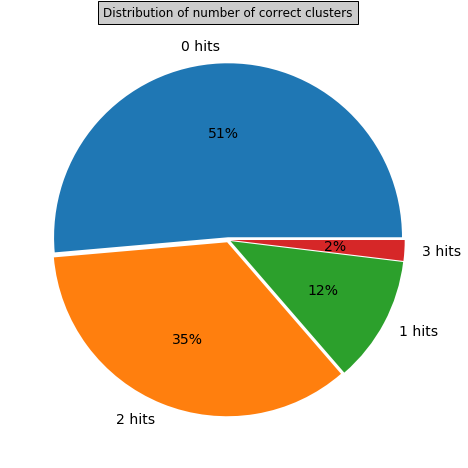

In [106]:
values = list(df.hits.value_counts())
labels = ["{} hits".format(x) for x in df.hits.unique()]

plt.figure(figsize=(8,8))
plt.pie(values, 
        labels=labels,
        explode=[0.015]*len(labels),     
        autopct='%1.0f%%',
        textprops={'fontsize': 14});
plt.title('Distribution of number of correct clusters', bbox={'facecolor':'0.8', 'pad':5})
plt.show()


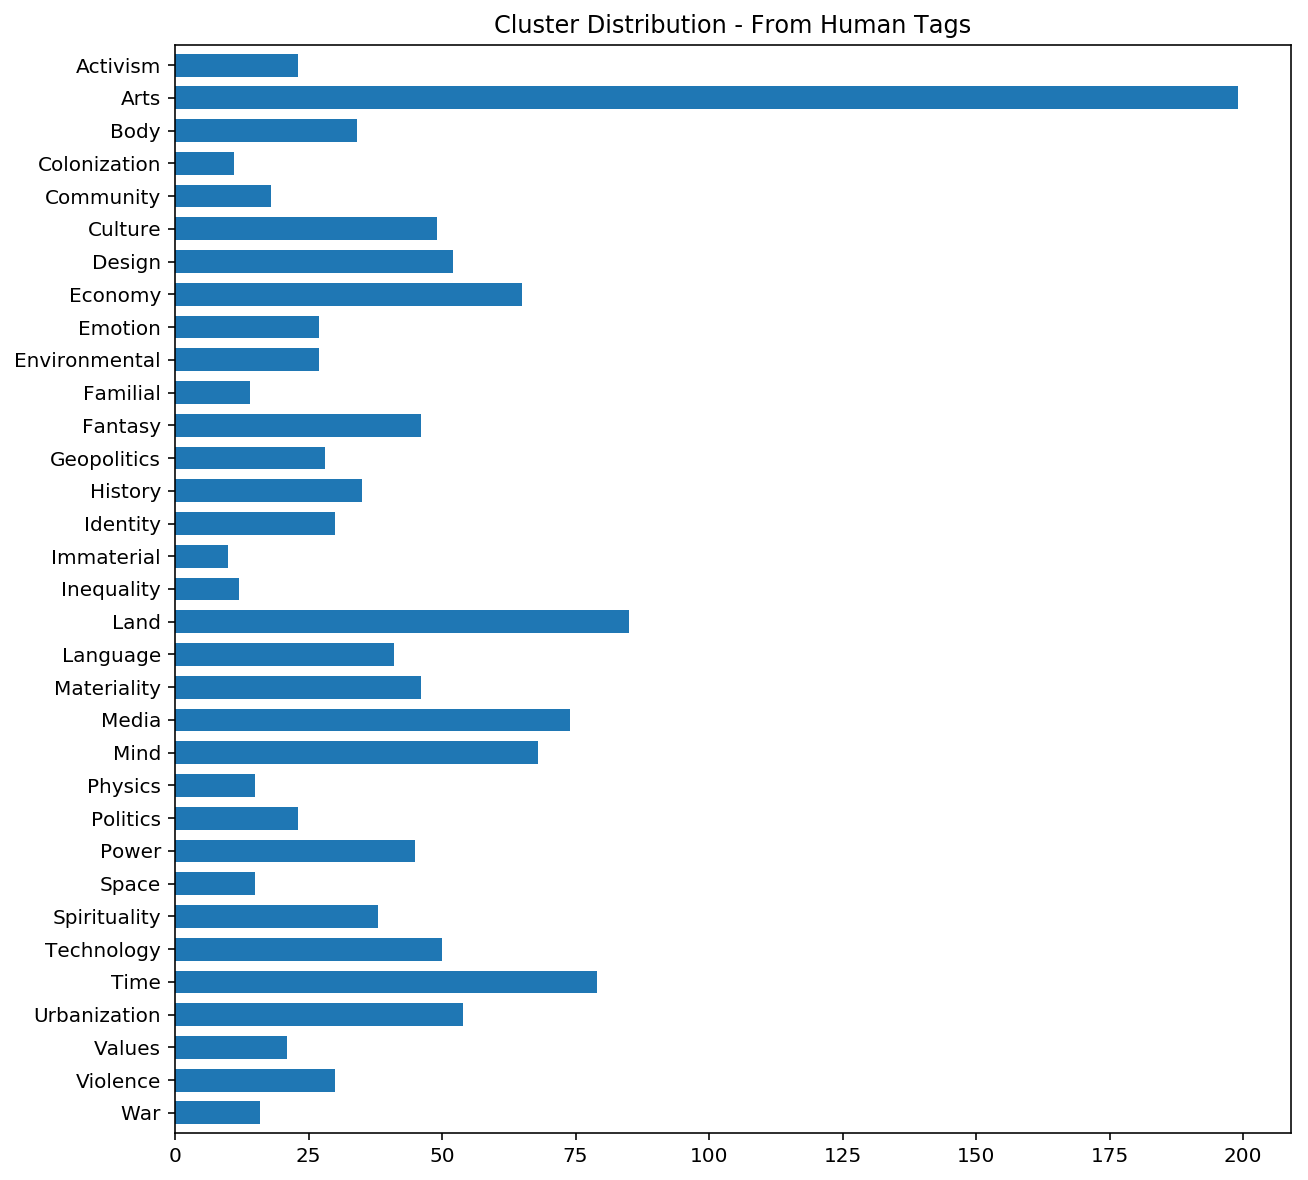

In [29]:
fig, ax = plt.subplots(dpi=144)
vc = df.machine_clusters_from_user_tags.str.split(',').apply(pd.Series).stack().value_counts()
vc = vc.sort_index()
vc.plot(kind='barh', 
        title="Cluster Distribution - From Human Tags", 
        figsize=(10,10),
        width=0.7,
        ax=ax)
ax.invert_yaxis()

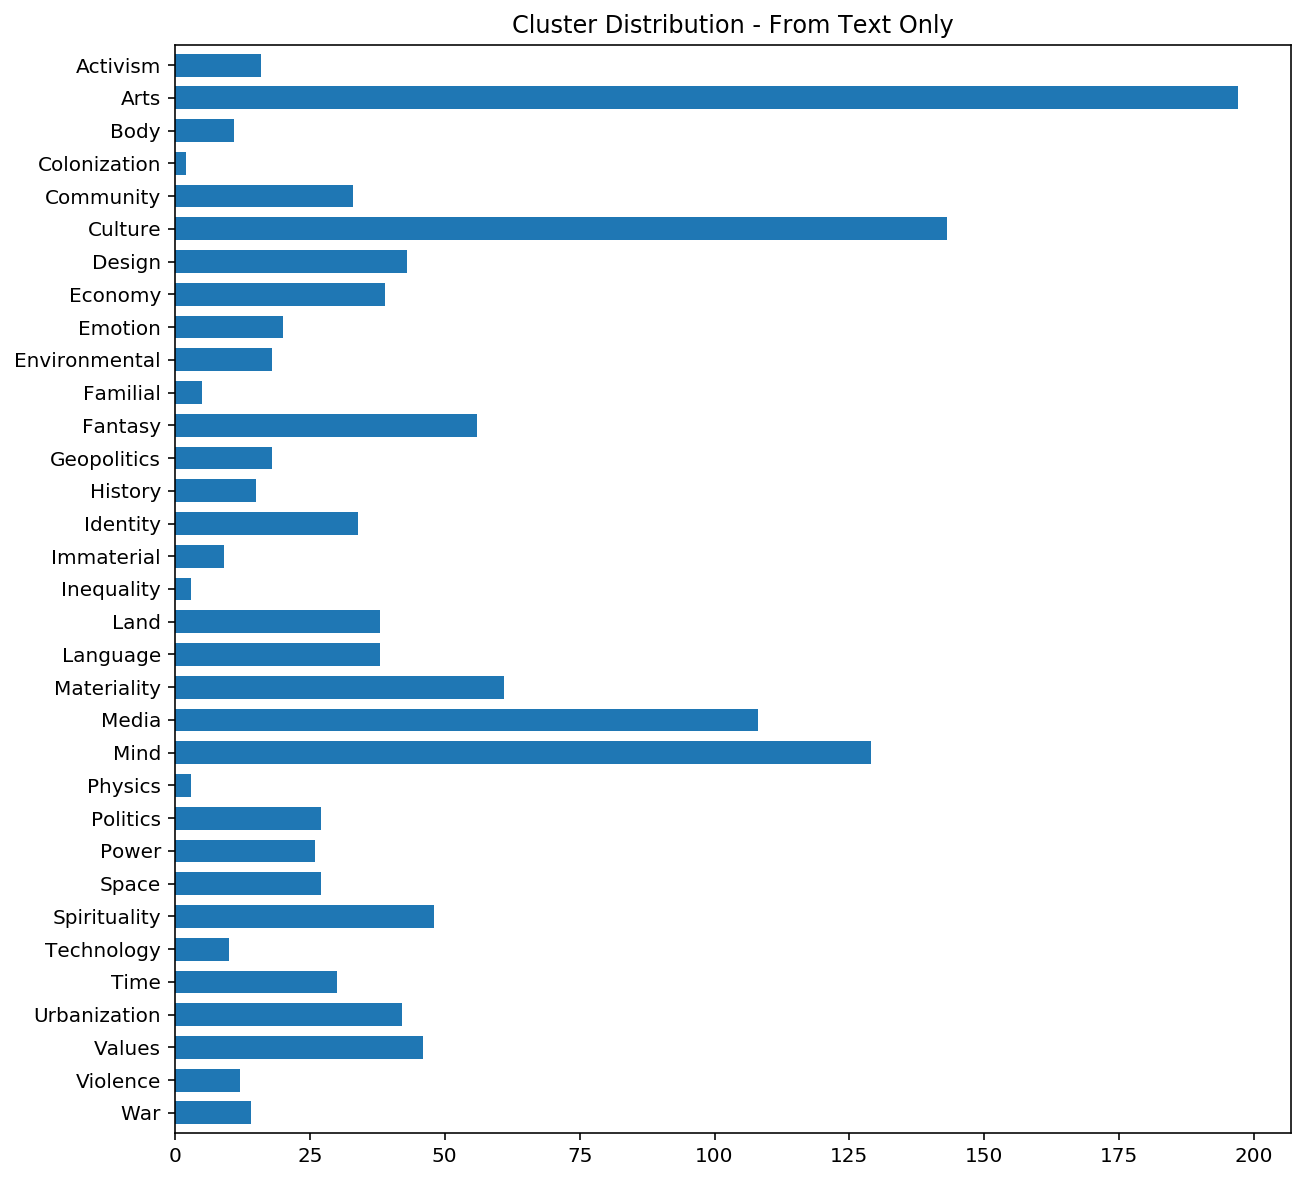

In [30]:
fig, ax = plt.subplots(dpi=144)
vc = df.machine_clusters_from_machine_tags.str.split(',').apply(pd.Series).stack().value_counts()
vc = vc.sort_index()
vc.plot(kind='barh', 
        title="Cluster Distribution - From Text Only", 
        figsize=(10,10),
        width=0.7,
        ax=ax)
ax.invert_yaxis()

In [107]:
df = pd.read_csv('results/all_kadist_works_superclusters_results_wup_0.76.csv' )
df.drop(columns=['permalink'], inplace=True)
df = df[pd.notnull(df['machine_clusters_from_machine_tags'])]
df.head()


,region,artist_name,title,machine_clusters_from_user_tags,machine_clusters_from_machine_tags,hits
0,Americas,"Jennifer Allora, Guillermo Calzadilla",Land Mark (Foot Prints) #12,"Cultural,Politics,Society","Society,Cultural,Material_Physical",2
2,Americas,Renee Rhodes,Moving Clocks Change Rhythm,"Cultural,Individual_Personal,Society","Individual_Personal,Material_Physical,Cultural",2
3,Americas,Fiamma Montezemolo,Fireflies,"Individual_Personal,Material_Physical,Society","Material_Physical,Politics,Individual_Personal",2
4,Europe,Mladen Stilinovic,Exploitation of the Dead,"Cultural,Individual_Personal,Material_Physical","Cultural,Individual_Personal,Material_Physical",3
5,Unspecified,Federico Herrero,Arbol y Pelicao (Tree and Pelican),"Cultural,Material_Physical,Society","Material_Physical,Cultural,Society",3


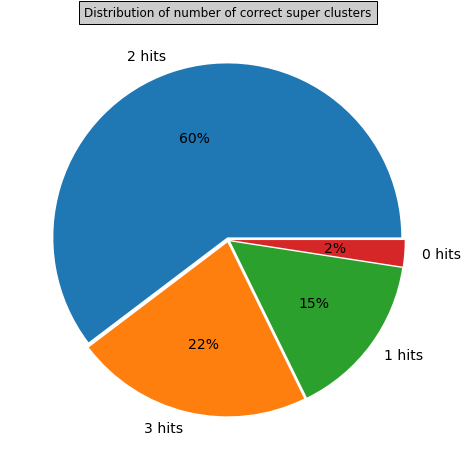

In [104]:
values = list(df.hits.value_counts())
labels = ["{} hits".format(x) for x in df.hits.unique()]

plt.figure(figsize=(8,8))
plt.pie(values, 
        labels=labels,
        explode=[0.015]*len(labels),     
        autopct='%1.0f%%',
        textprops={'fontsize': 14});
plt.title('Distribution of number of correct super clusters', bbox={'facecolor':'0.8', 'pad':5})
plt.show()
